# 캐글 - 타이타닉 생존자 예측하기

## (5) 모델 훈련 및 예측

이제 모델 학습과 예측을 위한 모든 작업이 끝났다.

선택할 수 있는 60개 이상의 예측 모델링 알고리즘이 있다. 몇 가지 모델로 범위를 좁히려면, 문제 유형과 솔루션 요구사항을 이해해야 한다. 

풀어야 할 문제는 분류와 회귀 문제다. 출력(생존 여부)과 다른 변수나 특징(Gender, Age, Port...)과의 관계를 파악해야 한다. 또한 주어진 데이터로 모델을 학습시키는 것이므로, 기계 학습 중 지도 학습이다. 

**지도 학습**과, **분류 및 회귀**라는 두 가지 기준을 사용하여 모델 선택 범위를 몇 개로 간추릴 수 있다.

### 머신러닝 알고리즘

- Logistic Regression(로지스틱 회귀)
- KNN(K-Neareast Neighbors, 최근접 이웃 알고리즘)
- SVM(Support Vector Machine)
- Naive Bayes Classifier(나이브 베이즈 분류)
- Decision Tree(의사결정트리)
- Random Forest
- Perceptorn
- Artificial neural network
- RVM(Relevance Vector Machine)



앞 노트북들에서 수행한 것들을 불러온다.

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 c

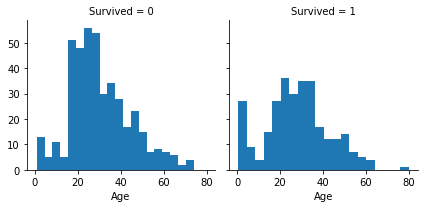

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


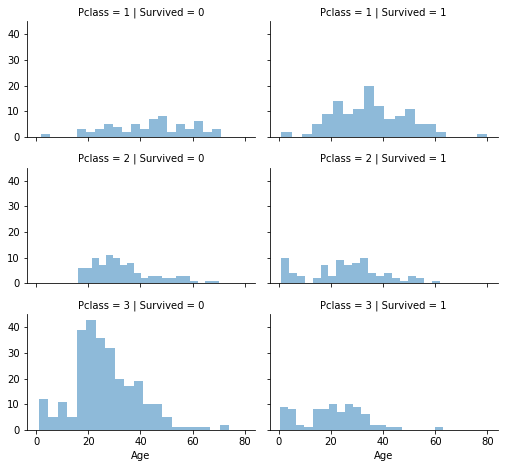

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


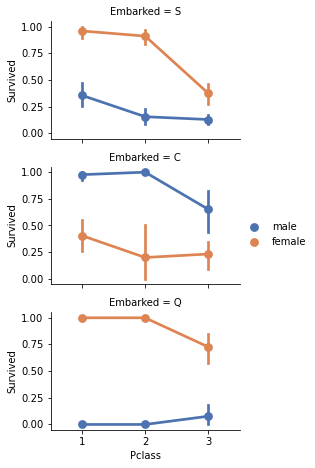

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


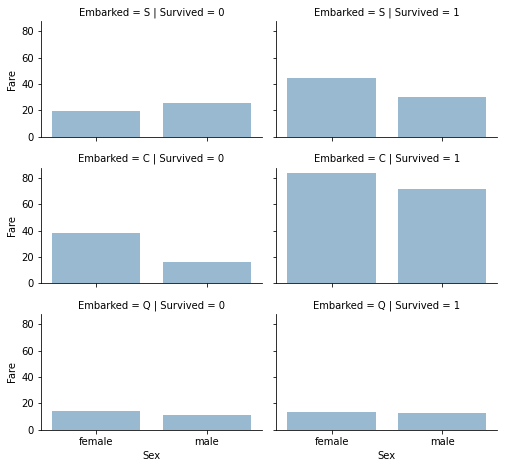

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 c

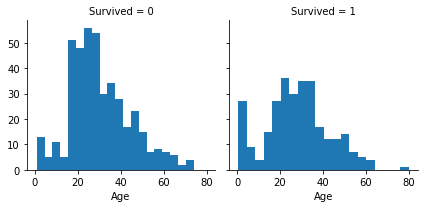

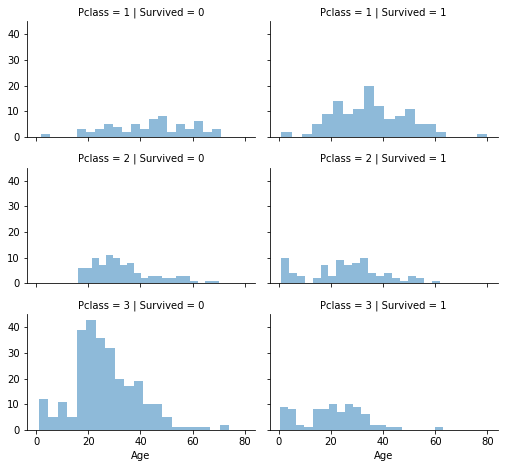

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


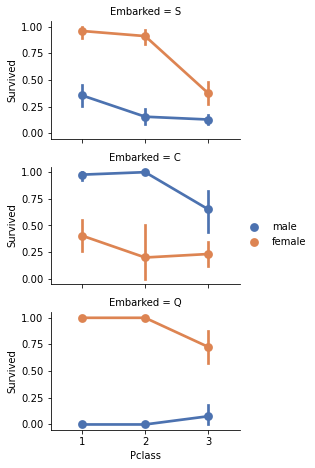

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


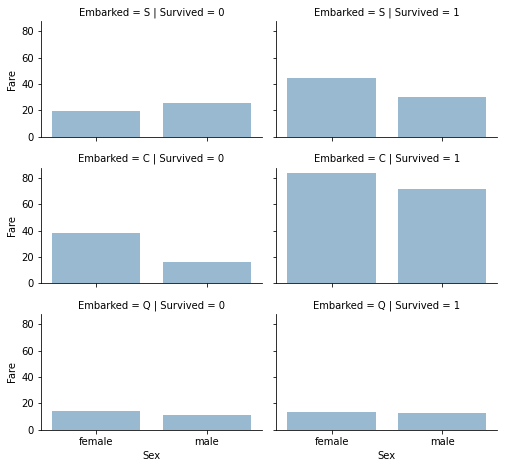

Before (891, 12) (418, 11) (891, 12) (418, 11)


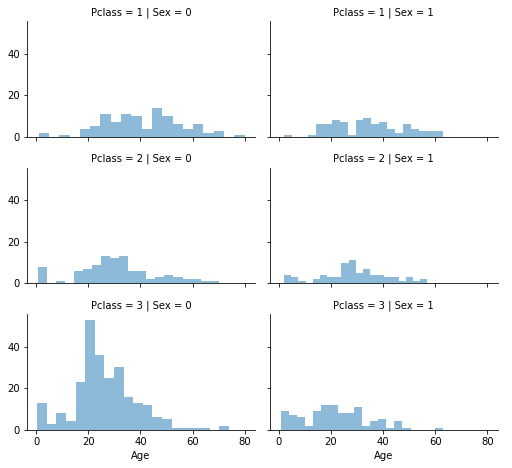

In [2]:
%run Titanic_ML23_데이터불러오고분석.ipynb
%run Titanic_ML4_데이터전처리.ipynb

In [26]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# post image via HTML
from IPython.display import Image
from IPython.core.display import HTML

In [4]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

### Logistic Regression

로지스틱 회귀는 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는 데 사용되는 통계 기법이다. 누적 로지스틱 분포인 로지스틱 함수를 사용하여 확률을 추정하여 종속 변수와 독립 변수 사이의 관계를 측정한다.
Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Binary Classification algorithm {spam, not spam}...

Cf. Linear Regression

선형 회귀의 결과 값은 연속적인 값이고, 로지스틱 회귀의 결과 값은 범주 값이다.

로지스틱 함수 (Sigmoid function)

In [39]:
Image(url="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/480px-Logistic-curve.svg.png", width=300)

In [5]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

로지스틱 회귀를 사용하여 특징 생성(Creating) 및 완성(Completing)에 대한 가정과 결정을 검증할 수 있다. 결정 함수에서 특징의 계수를 계산하여 이를 수행할 수 있다.

In [6]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


계수가 양수이면, 확률에 로그를 취한 값이 증가하고(따라서 확률이 증가), 계수가 음수이면, 확률에 로그를 취한 값이 감소한다(따라서 확률 감소).

Sex는 가장 높은 양의 계수이고, Sex 값이 증가할 수록(male: 0에서 female: 1) Survived=1의 확률이 가장 많이 증가함을 의미한다. 반대로 Pclass가 증가하면, Survived=1의 확률이 가장 많이 감소한다. 이런 식으로 Age*Class는 Survived와두 번째로 높은 음의 상관 관계를 가지고 있기 때문에 모델링하기에 좋은 인공적인 특징이다. 두 번째로 높은 양의 상관관계인 Title도 마찬가지다.

### Support Vector Machines (SVM)

Support Vector Machines는 분류 및 회귀분석에 사용되는 데이터를 분석하는 학습 알고리즘과 관련된 지도 학습 모델이다. 각각 두 범주 중 하나 또는 다른 범주에 속하는 것으로 표시된 일련의 학습 표본이 주어지면, SVM 학습 알고리즘은 새로운 테스트 표본을 한 범주 또는 다른 범주에 할당하는 모델을 구축하여 비확률적 이진 선형 분류기로 만든다. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

In [42]:
Image(url="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/450px-SVM_margin.png", width=300)

In [19]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

SVM의 신뢰도 점수는 로지스틱 회귀 모델보다 낮다. (???: 이 노트북을 작성한 분과 신뢰도 점수가 다르다. 모델이 계속 수정되는 것인가???)

### KNN (K-Neareast Neighbors)

패턴 인식에서 KNN은 분류 및 회귀에 사용되는 비모수적 방법이다. 표본은 k 개의 가장 가까운 이웃 중에서 가장 일반적인(과반수를 차지하는) 클래스에 할당된다. (k는 양의 정수, 일반적으로 작은 홀수) k=1이면 객체는 하나의 가장 가까운 이웃의 클래스에 단순히 할당된다. Reference [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

In [52]:
Image(url="https://miro.medium.com/max/650/1*OyYyr9qY-w8RkaRh2TKo0w.png", width=300)

In [22]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

KNN 신뢰도 점수는 지금까지 평가한 모델 중 가장 높다. (???)

### Naive Bayes Classifiers

기계 학습에서 나이브 베이즈 분류기는 특징 간의 강력한 (naive) 독립 가정을 사용하여 Bayes의 정리를 적용한 간단한 확률 분류기 중 하나다. 나이브 베이즈 분류기는 확장성이 뛰어나 학습 문제에서 변수 (특징) 수에 선형의 여러 매개 변수가 필요하다.
Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

Cf. 베이즈 정리

${\displaystyle P(A_{1}|B)={\frac {P(B\cap A_{1})}{P(B)}}}$

$= {\displaystyle {\frac {P(B|A_{1})P(A_{1})}{P(B)}}}{\displaystyle {\frac {P(B|A_{1})P(A_{1})}{P(B)}}}$

$= {\displaystyle {\frac {P(B|A_{1})P(A_{1})}{P(B|A_{1})P(A_{1})+P(B|A_{2})P(A_{2})}}}{\displaystyle {\frac {P(B|A_{1})P(A_{1})}{P(B|A_{1})P(A_{1})+P(B|A_{2})P(A_{2})}}}$

In [9]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

나이브 베이즈 분류기의 신뢰도 점수는 지금까지 평가한 모델 중 가장 낮다.

### Perceptron

퍼셉트론은 이진 분류기(숫자로 이뤄진 벡터로 표현되는 입력이 특정 클래스에 속하는 지 여부를 결정할 수 있는 함수)의 지도 학습을 위한 알고리즘이다. 선형 분류기의 한 유형이다. 즉, 가중치 집합을 특징 벡터와 결합하는 선형 예측 함수를 기반으로 예측하는 분류 알고리즘이다. 알고리즘은 테스트 묶음의 요소를 한 번에 하나씩 처리한다는 점에서 온라인 학습을 허용한다.
Reference [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [10]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

In [11]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


79.01

In [12]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

76.43

### Decision Tree

이 모델은 특징(나뭇가지)을 목표 값(나뭇잎)에 대한 결론에 매핑하는 예측 모델로 의사 결정 트리를 사용한다. 대상 변수가 유한한 값의 집합을 가질 수 있는 트리 모델을 분류 트리라고 한다. 이러한 트리 구조에서 잎(리프 노드)은 클래스 라벨을 나타내고, 가지는 클래스 라벨과 관련있는 특징들의 논리곱 나타낸다. 대상 변수가 연속적인 값(일반적으로 실수)을 가질 수 있는 의사 결정 트리를 회귀 트리라고 한다.
Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

In [41]:
Image(url="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/CART_tree_titanic_survivors_KOR.png/525px-CART_tree_titanic_survivors_KOR.png", width=300)

In [13]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

Decision Tree의 신뢰도 점수는 지금까지 평가한 모델 중 가장 높다.

### Random Forest

Random Forests는 가장 인기있는 모델 중 하나다. 랜덤 포레스트 또는 랜덤 결정 포레스트는 분류, 회귀 및 기타 작업을 위한 앙상블 학습 방법으로, 학습 시간에 다수의 결정 트리(n_estimators=100)를 구성하고 가장 많이 등장한 클래스(분류) 또는 개별 트리의 평균 예측(회귀)을 출력하여 작동한다.
Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

Cf. Ensemble learning method (앙상블 학습법) <br>
학습 알고리즘들을 따로 쓰는 경우에 비해 더 좋은 예측 성능을 얻기 위해 다수의 학습 알고리즘을 사용하는 방법이다. Reference [Wikipedia](https://ko.wikipedia.org/wiki/%EC%95%99%EC%83%81%EB%B8%94_%ED%95%99%EC%8A%B5%EB%B2%95).

In [44]:
Image(url="https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png", width=300)

In [14]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

Random Forest의 신뢰도 점수는 지금까지 평가된 모델 중 가장 높다. 대회에 이 모델의 출력 (Y_pred)을 제출하기로 결정한다. 

### 모델 평가

이제 모든 모델에 대한 평가 순위를 매겨 문제에 가장 적합한 모델을 선택할 수 있다. Decision Tree와 Random Forest의 점수는 동일하지만, Decision Tree의 학습 묶음에서 오버피팅하는 경향이 있기에 Random Forest를 사용하도록 한다.

In [15]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
2,Logistic Regression,80.36
7,Linear SVC,79.01
5,Perceptron,78.34
0,Support Vector Machines,78.23
6,Stochastic Gradient Decent,76.43
4,Naive Bayes,72.28


In [16]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)

Kaggle에 제출한 결과, 6,082 개의 대회 항목 중 3,883 점을 얻었다.

## References

이 노트북은 타이타닉 대회 및 기타 소스를 바탕으로 만들어졌다.

- [A journey through Titanic](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic)
- [Getting Started with Pandas: Kaggle's Titanic Competition](https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests)
- [Titanic Best Working Classifier](https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier)

## 참고자료

- 캐글 노트북
https://www.kaggle.com/c/titanic/overview

- 머신러닝 알고리즘 설명
https://edu.goorm.io/learn/lecture/4012/%2525EB%2525A8%2525B8%2525EC%25258B%2525A0%2525EB%25259F%2525AC%2525EB%25258B%25259D-%2525EC%25259D%2525B4%2525EB%2525A1%2525A0-%2525EB%2525B0%25258F-%2525ED%25258C%25258C%2525EC%25259D%2525B4%2525EC%25258D%2525AC-%2525EC%25258B%2525A4%2525EC%25258A%2525B5#